In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

In [4]:
def PCA(X, k):
    X = X - np.mean(X, axis= 0)
    X = np.array(X)
    m = X.shape[0]
    n = X.shape[1]
    sigma = np.dot(X.T, X)
    eig_val, eig_vec = np.linalg.eig(sigma)
    eig = [(np.abs(eig_val[i]), eig_vec[:, i]) for i in range(0,n)]
    sorted(eig, reverse= True)
    P = np.array([a[1] for a in eig[:k]]).T
    return np.dot(X, P)


K means on Bp

In [5]:
BP_var = pd.read_excel('../Data/K_means_data_Bp_xlsx.xlsx')
BP_var = BP_var.drop(columns = 'Unnamed: 0')
BP_var = BP_var.drop(columns = '表面风化')
BP_var

,文物编号,二氧化硅(SiO2),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),二氧化硫(SO2),氧化铝(Al2O3),氧化铜(CuO),氧化钠(Na2O),氧化钙(CaO),氧化铁(Fe2O3),氧化镁(MgO),氧化钾(K2O),氧化锶(SrO),氧化锡(SnO2)
0,20,37.36,9.30,23.55,5.75,0.00,5.45,4.78,0.00,0.00,1.51,0.00,0.71,0.00,0.00
1,23,53.79,16.98,11.86,0.00,0.00,1.42,2.99,7.92,0.50,0.00,0.71,0.00,0.33,0.00
2,24,31.94,29.14,26.23,0.14,0.00,1.59,8.46,0.00,0.47,0.00,0.00,0.00,0.91,0.00
3,25,50.61,31.90,6.65,0.19,0.00,1.90,1.12,2.31,0.63,1.55,0.00,0.00,0.20,0.00
4,28,68.08,17.14,4.04,1.04,0.00,4.70,0.33,0.00,1.34,0.41,1.00,0.26,0.12,0.23
5,29,63.30,12.31,2.03,0.41,0.00,14.34,0.74,0.92,2.98,0.81,1.49,0.30,0.25,0.00
6,30,34.34,39.22,10.29,0.00,0.00,4.35,0.00,0.00,4.49,2.12,0.98,1.41,0.35,0.40
7,30,36.93,37.74,10.35,1.41,0.00,3.86,0.00,0.00,4.24,2.74,0.51,0.00,0.48,0.44
8,31,65.91,16.55,3.42,1.62,0.00,3.11,0.44,0.00,1.60,4.59,0.89,0.00,0.30,0.00
9,32,69.71,19.76,4.88,0.17,0.00,2.36,0.11,0.00,0.46,1.00,0.00,0.21,0.00,0.00


In [6]:
Data = BP_var.iloc[:, 1 : 11]
Data

,二氧化硅(SiO2),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),二氧化硫(SO2),氧化铝(Al2O3),氧化铜(CuO),氧化钠(Na2O),氧化钙(CaO),氧化铁(Fe2O3)
0,37.36,9.30,23.55,5.75,0.00,5.45,4.78,0.00,0.00,1.51
1,53.79,16.98,11.86,0.00,0.00,1.42,2.99,7.92,0.50,0.00
2,31.94,29.14,26.23,0.14,0.00,1.59,8.46,0.00,0.47,0.00
3,50.61,31.90,6.65,0.19,0.00,1.90,1.12,2.31,0.63,1.55
4,68.08,17.14,4.04,1.04,0.00,4.70,0.33,0.00,1.34,0.41
5,63.30,12.31,2.03,0.41,0.00,14.34,0.74,0.92,2.98,0.81
6,34.34,39.22,10.29,0.00,0.00,4.35,0.00,0.00,4.49,2.12
7,36.93,37.74,10.35,1.41,0.00,3.86,0.00,0.00,4.24,2.74
8,65.91,16.55,3.42,1.62,0.00,3.11,0.44,0.00,1.60,4.59
9,69.71,19.76,4.88,0.17,0.00,2.36,0.11,0.00,0.46,1.00


In [7]:
item_Bp = BP_var['文物编号']
item_Bp

0     20
1     23
2     24
3     25
4     28
5     29
6     30
7     30
8     31
9     32
10    33
11    35
12    37
13    42
14    42
15    44
16    45
17    46
18    47
19    49
20    50
21    53
22    55
23     2
24     8
25     8
26    11
27    19
28    26
29    26
30    34
31    36
32    38
33    39
34    40
35    41
36    43
37    43
38    48
39    49
40    50
41    51
42    51
43    52
44    54
45    54
46    56
47    57
48    58
Name: 文物编号, dtype: int64

K_means on Bp

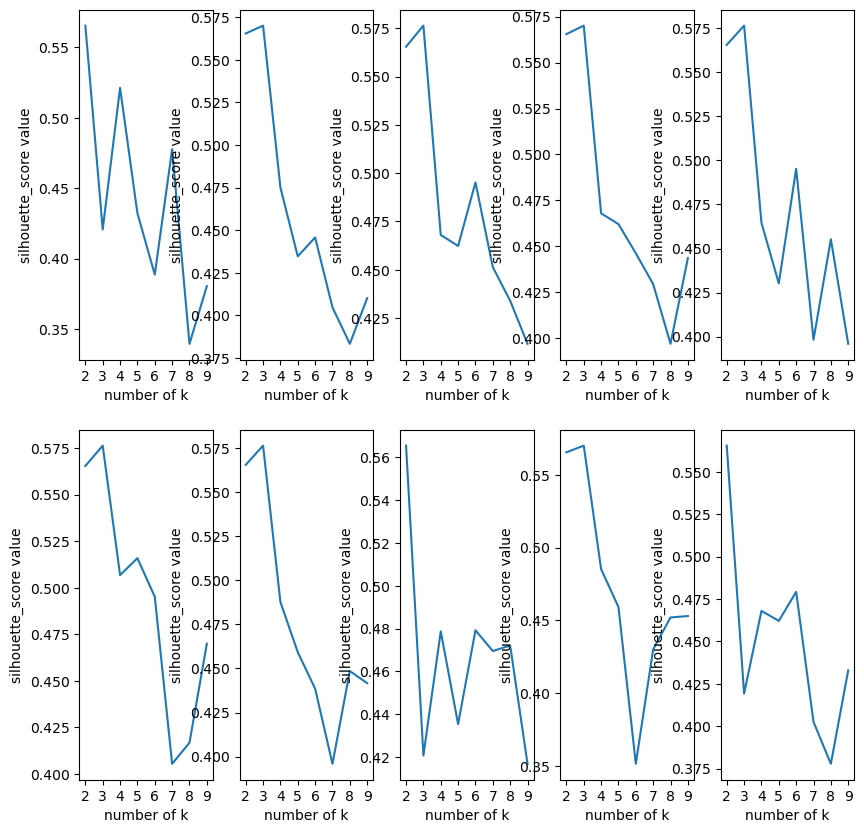

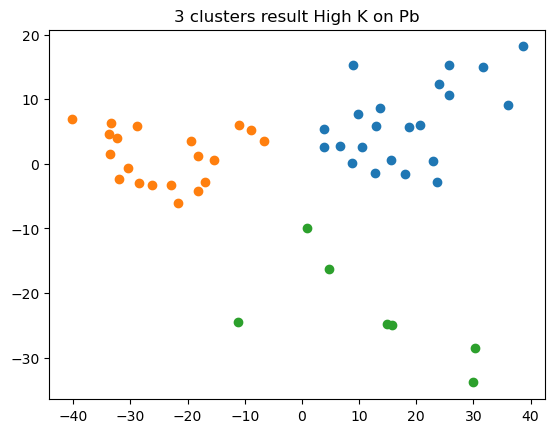

In [8]:
X = PCA(Data, 2)
loss = []
label_Bp = []
best = 0
best_k = 0
best_model_Bp = 0
best_label_Bp = []
names = range(2,10)
names = [str(i) for i in names]

plt.figure(figsize = (10, 10))
for i in range(10):
    ss = []
    for k in range(2, 10):
        model = MiniBatchKMeans(n_clusters = k, init = 'k-means++', n_init = 10)
        label_Bp = model.fit_predict(X)
        loss.append(-model.score(X))
        score = silhouette_score(X = X, labels = label_Bp)
        ss.append(score)
        if score > best:
            best = score
            best_k = k
            best_label_Bp = label_Bp
            best_model_Bp = model

    x = range(2, 10)
    plt.subplot(2, 5, i + 1)
    plt.plot(x, ss)
    plt.xticks(x, names)
    plt.xlabel('number of k')
    plt.ylabel('silhouette_score value')

#plt.savefig('../Q2_answer/Q2_2/Pb/Pb_ss-k.png')

plt.figure()
for j in range(best_k):
    plt.scatter(X[best_label_Bp == j, 0], X[best_label_Bp == j, 1])
    plt.title(f'{best_k} clusters result High K on Pb')

#plt.savefig('../Q2_answer/Q2_3/Pb/Pb_res.png')

plt.show()

In [9]:
res_Bp = np.column_stack([item_Bp, best_label_Bp])
res_Bp

array([[20,  2],
       [23,  1],
       [24,  2],
       [25,  1],
       [28,  1],
       [29,  1],
       [30,  0],
       [30,  0],
       [31,  1],
       [32,  1],
       [33,  1],
       [35,  1],
       [37,  1],
       [42,  1],
       [42,  1],
       [44,  1],
       [45,  1],
       [46,  1],
       [47,  1],
       [49,  1],
       [50,  1],
       [53,  1],
       [55,  1],
       [ 2,  0],
       [ 8,  2],
       [ 8,  2],
       [11,  2],
       [19,  0],
       [26,  2],
       [26,  2],
       [34,  0],
       [36,  0],
       [38,  0],
       [39,  0],
       [40,  0],
       [41,  0],
       [43,  0],
       [43,  0],
       [48,  1],
       [49,  0],
       [50,  0],
       [51,  0],
       [51,  0],
       [52,  0],
       [54,  0],
       [54,  0],
       [56,  0],
       [57,  0],
       [58,  0]])

In [10]:
best_model_Bp.cluster_centers_

array([[ 18.35730708,   6.25303693],
       [-24.25414371,   0.62815343],
       [ 11.18556747, -23.11578807]])

K means on Hp

In [11]:
Hp_var = pd.read_excel('../Data/K_means_data_Hp_xlsx.xlsx')
Hp_var = Hp_var.drop(columns = 'Unnamed: 0')
Hp_var

,文物编号,二氧化硅(SiO2),氧化钾(K2O),氧化钙(CaO),氧化铝(Al2O3),氧化铜(CuO),氧化铁(Fe2O3),五氧化二磷(P2O5),氧化钠(Na2O),氧化钡(BaO),氧化镁(MgO),氧化锡(SnO2),氧化铅(PbO),二氧化硫(SO2),氧化锶(SrO)
0,1,69.33,9.99,6.32,3.93,3.87,1.74,1.17,0.00,0.00,0.87,0.00,0.00,0.39,0.00
1,3,87.05,5.19,2.01,4.06,0.78,0.00,0.66,0.00,0.00,0.00,0.00,0.25,0.00,0.00
2,3,61.71,12.37,5.87,5.50,5.09,2.16,0.70,0.00,2.86,1.11,0.00,1.41,0.00,0.10
3,4,65.88,9.67,7.12,6.44,2.18,2.06,0.79,0.00,0.00,1.56,0.00,0.00,0.36,0.00
4,5,61.58,10.95,7.35,7.50,3.27,2.62,0.94,0.00,0.00,1.77,0.00,0.00,0.47,0.06
5,6,67.65,7.37,0.00,11.15,2.51,2.39,4.18,0.00,1.38,1.98,0.00,0.20,0.00,0.11
6,6,59.81,7.68,5.41,10.05,2.18,6.04,4.50,0.00,0.97,1.73,0.00,0.35,0.00,0.12
7,13,59.01,12.53,8.70,6.16,4.73,2.88,1.27,2.86,0.00,0.00,0.00,0.00,0.00,0.00
8,14,62.47,12.28,8.23,9.23,0.47,0.50,0.16,3.38,0.00,0.66,0.00,1.62,0.00,0.00
9,16,65.18,14.52,8.27,6.18,1.07,0.42,0.00,2.10,0.00,0.52,0.00,0.11,0.00,0.04


In [12]:
item_Hp = Hp_var['文物编号']
item_Hp

0      1
1      3
2      3
3      4
4      5
5      6
6      6
7     13
8     14
9     16
10    18
11    21
12     7
13     9
14    10
15    12
16    22
17    27
Name: 文物编号, dtype: int64

In [13]:
Data = Hp_var.iloc[:, 1 : 5]
Data

,二氧化硅(SiO2),氧化钾(K2O),氧化钙(CaO),氧化铝(Al2O3)
0,69.33,9.99,6.32,3.93
1,87.05,5.19,2.01,4.06
2,61.71,12.37,5.87,5.50
3,65.88,9.67,7.12,6.44
4,61.58,10.95,7.35,7.50
5,67.65,7.37,0.00,11.15
6,59.81,7.68,5.41,10.05
7,59.01,12.53,8.70,6.16
8,62.47,12.28,8.23,9.23
9,65.18,14.52,8.27,6.18


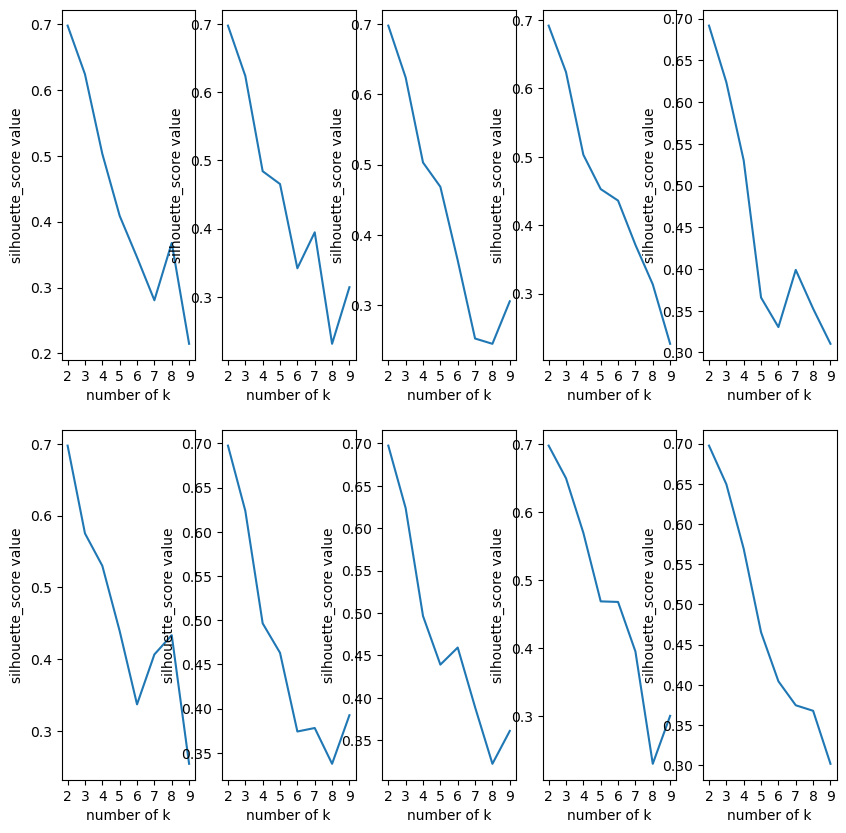

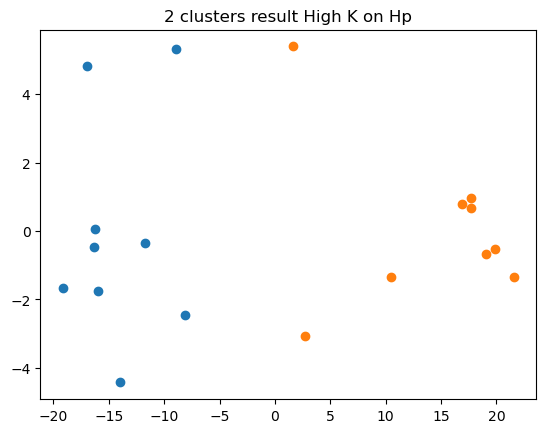

In [14]:
X = PCA(Data, 2)
loss = []
label_Hp = []
best = 0
best_k = 0
best_model_Hp = 0
best_label_Hp = []
names = range(2,10)
names = [str(i) for i in names]

plt.figure(figsize = (10, 10))
for i in range(10):
    ss = []
    for k in range(2, 10):
        model = MiniBatchKMeans(n_clusters = k, init = 'k-means++', n_init = 10)
        label_Hp = model.fit_predict(X)
        score = silhouette_score(X = X, labels = label_Hp)
        ss.append(score)
        if score > best:
            best = score
            best_k = k
            best_label_Hp = label_Hp
            best_model_Hp = model

    x = range(2, 10)
    plt.subplot(2, 5, i + 1)
    plt.plot(x, ss)
    plt.xticks(x, names)
    plt.xlabel('number of k')
    plt.ylabel('silhouette_score value')

plt.savefig('../Q2_answer/Q2_2/Hp/Hp_ss-k.png')
#plt.savefig('../Q2_answer/Q2_2/Hp/Hp_ss-k_op.png')


plt.figure()
for j in range(best_k):
    plt.scatter(X[best_label_Hp == j, 0], X[best_label_Hp == j, 1])
    plt.title(f'{best_k} clusters result High K on Hp')
#plt.savefig('../Q2_answer/Q2_2/Hp/Hp_res.png')
#plt.savefig('../Q2_answer/Q2_2/Hp/Hp_res_op.png')
plt.show()

In [15]:
res_Hp = np.column_stack([item_Hp, best_label_Hp])
res_Hp

array([[ 1,  0],
       [ 3,  1],
       [ 3,  0],
       [ 4,  0],
       [ 5,  0],
       [ 6,  0],
       [ 6,  0],
       [13,  0],
       [14,  0],
       [16,  0],
       [18,  1],
       [21,  1],
       [ 7,  1],
       [ 9,  1],
       [10,  1],
       [12,  1],
       [22,  1],
       [27,  1]])

In [20]:
pd.DataFrame(res_Hp).to_excel('../Q2_answer/Q2_2/Hp/res_Hp.xlsx')
pd.DataFrame(res_Bp).to_excel('../Q2_answer/Q2_2/Pb/res_Pb.xlsx')

In [16]:
best_model_Hp.cluster_centers_

array([[-14.53079804,  -0.14314295],
       [ 13.84534927,   0.36284058]])

In [17]:
Bp_cluster = best_model_Bp.cluster_centers_
Bp_cluster = pd.DataFrame(Bp_cluster)
Bp_cluster

,0,1
0,18.357307,6.253037
1,-24.254144,0.628153
2,11.185567,-23.115788


In [18]:
Hp_cluster = best_model_Hp.cluster_centers_
Hp_cluster = pd.DataFrame(Hp_cluster)
Hp_cluster

,0,1
0,-14.530798,-0.143143
1,13.845349,0.362841


In [20]:
#Bp_cluster.to_csv('Bp_cluster_center.csv')
#Hp_cluster.to_csv('Hp_cluster_center.csv')

Test the sensitive of the model

Through variance from number of the features

In [39]:
def K_means_train(Data):
    X = PCA(Data, 2)
    loss = []
    ss = []
    label_Hp = []
    best = 0
    best_k = 0
    best_model_Hp = 0
    best_label_Hp = []
    names = range(2,10)
    names = [str(i) for i in names]
    global score

    for k in range(2, 10):
        model = MiniBatchKMeans(n_clusters = k, init = 'k-means++', n_init = 10)
        label_Hp = model.fit_predict(X)
        loss.append(-model.score(X))
        score = silhouette_score(X = X, labels = label_Hp)
        ss.append(score)
        if score > best:
            best = score
            best_k = k
            best_label_Hp = label_Hp
            best_model_Hp = model

    return best, best_k, ss

def plot_result(ss, feature_num, kind):
    """
    plt.plot(x, loss)
    plt.xticks(x, names)
    plt.xlabel('number of k')
    plt.ylabel('loss function value')
    """
    x = range(2, 10)
    plt.figure()
    plt.plot(x, ss)
    plt.xticks(x, names)
    plt.xlabel('number of k')
    plt.ylabel('silhouette_score value')
    plt.title(f'score distribution with {feature_num} features')
    if kind == 1:
        #plt.savefig(f'../Q2_answer/Q2_3/Pb/sensitivity/score_{feature_num}_feature.png')
        pass

    if kind == 2:
        plt.savefig(f'../Q2_answer/Q2_3/Hp/sensitivity/score_{feature_num}_feature.png')


Pb

In [33]:
feature_num = [4, 6, 8, 10, 12, 14]

In [ ]:
best_list = []
best_k_list = []
for i in feature_num:
    Data = BP_var.iloc[:, 1 : i + 1]
    best, best_k, score = K_means_train(Data)
    best_list.append(best)
    best_k_list.append(best_k)
    plot_result(score, i, 1)

plt.show()

In [ ]:
plt.figure()
plt.plot(feature_num, best_list)
plt.xlabel('feature_num')
plt.ylabel('best score')
#plt.savefig('../Q2_answer/Q2_3/Pb/rationality/best_feature.png')
plt.figure()
plt.plot(feature_num, best_k_list)
#plt.savefig('../Q2_answer/Q2_3/Pb/rationality/best_k.png')

plt.show()

Hp

In [ ]:
best_list = []
best_k_list = []
for i in feature_num:
    Data = Hp_var.iloc[:, 1 : i + 1]
    best, best_k, score = K_means_train(Data)
    best_list.append(best)
    best_k_list.append(best_k)
    plot_result(score, i, 2)

plt.show()

In [ ]:
plt.figure()
plt.plot(feature_num, best_list)
plt.xlabel('feature_num')
plt.ylabel('best score')
#plt.savefig('../Q2_answer/Q2_3/Hp/rationality/best_feature.png')
plt.figure()
plt.plot(feature_num, best_k_list)
#plt.savefig('../Q2_answer/Q2_3/Hp/rationality/best_k.png')

plt.show()

Sensitive analysis through data disturb


In [73]:
def proceed_disturb(possibility, Data, noise, col):
    if possibility > 0 and possibility <= 0.25:
        Data.iloc[:, col - 1] = Data.iloc[:, col - 1] + noise
    if possibility > 0.25 and possibility <= 0.5:
        Data.iloc[:, col - 1] = Data.iloc[:, col - 1] * noise
    if possibility > 0.5 and possibility <= 0.75:
        Data.iloc[:, col - 1] = Data.iloc[:, col - 1] - noise
    if possibility > 0.75 and possibility <= 1:
        Data.iloc[:, col - 1] = Data.iloc[:, col - 1] / noise

    return Data

def disturb(Data, col):
    #print(col)
    noise = (Data.iloc[:, col - 1].mean()) / 10
    #print(noise)
    operate = np.random.random()
    #print(operate)
    Data = proceed_disturb(operate, Data, noise, col)

    return Data

Hp

non-op

In [81]:
def plot_result_sen(ss, feature, kind):
    """
    plt.plot(x, loss)
    plt.xticks(x, names)
    plt.xlabel('number of k')
    plt.ylabel('loss function value')
    """
    x = range(2, 10)
    plt.figure()
    plt.plot(x, ss)
    plt.xticks(x, names)
    plt.xlabel('number of k')
    plt.ylabel('silhouette_score value')
    plt.title(f'score distribution with {feature} feature')
    if kind == 1:
        plt.savefig(f'../Q2_answer/Q2_3/Pb/sensitivity/score_disturb_{feature}th_feature.png')

    if kind == 2:
        plt.savefig(f'../Q2_answer/Q2_3/Hp/sensitivity/score_disturb_{feature}th_feature.png')

In [ ]:
Data = Hp_var.iloc[:, 1 : 9]
best_list = []

for i in range(8):
    Data = disturb(Data, i + 1)
    best, best_k, ss = K_means_train(Data)
    plot_result_sen(ss, i + 1, 2)
    best_list.append(best)

pd.DataFrame(best_list).to_excel(f'../Q2_answer/Q2_3/Hp/sensitivity/best_score_disturb.xlsx')

Hp-op

In [ ]:
Data = Hp_var.iloc[:, 1 : 5]
best_list = []
for i in range(4):
    Data = disturb(Data, i + 1)
    best, best_k, ss = K_means_train(Data)
    plot_result_sen(ss, i + 1, 2)
    best_list.append(best)

pd.DataFrame(best_list).to_excel(f'../Q2_answer/Q2_3/Hp/sensitivity/best_score_disturb_op.xlsx')

Pb

In [ ]:
Data = BP_var.iloc[:, 1 : 9]
best_list = []

for i in range(8):
    Data = disturb(Data, i + 1)
    best, best_k, ss = K_means_train(Data)
    plot_result_sen(ss, i + 1, 1)
    best_list.append(best)

pd.DataFrame(best_list).to_excel(f'../Q2_answer/Q2_3/Pb/sensitivity/best_score_disturb.xlsx')